# 機器學習從零至一

> 集保結算所

[數聚點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

## 什麼是機器學習

## 機器學習的三個要素、一個但書

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Machine Learning, Tom Mitchell, McGraw Hill, 1997](http://www.cs.cmu.edu/~tom/mlbook.html)

## 傳統透過電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/3pojPXW.png?1)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定規則 $w$ 以及資料 $X$，我們就可以定義出函數 $f$ 生成答案 $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## 以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## 給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 預測數值時最常見的損失函數 $J$

最小化均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2
\end{align}

## 預測類別時最常見的損失函數 $J$

最小化預測錯誤個數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E_j) \text{ where } E_j \; \text{represents the occurrence of } y_j \neq \hat{y_j}
\end{align}

## 機器學習的資料表達

## 特徵矩陣與目標陣列

- 外型 `(m, n)` 的特徵矩陣 $X$
- 外型 `(m,)` 的目標陣列 $y$

In [1]:
import matplotlib.pyplot as plt

def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Array ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ m_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

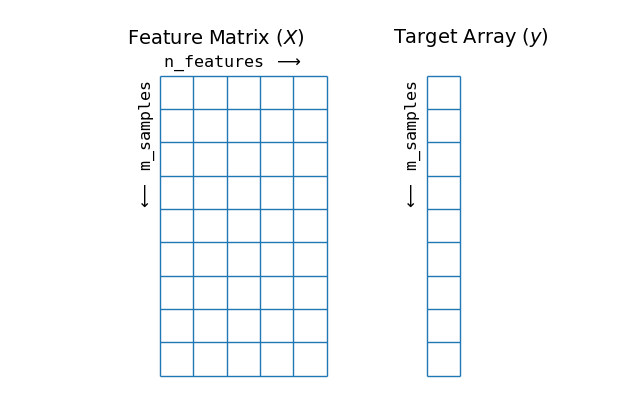

In [2]:
# 來源：<https://jakevdp.github.io/PythonDataScienceHandbook>
plot_X_y()

## 如何從 `DataFrame` 中擷取特徵矩陣與目標陣列

- 還沒有正式介紹如何載入資料，之後在「資料的載入」章節會說明。
- 還沒有正式介紹如何從 `DataFrame` 選擇欄位，之後在「基礎資料框操作」章節會說明。

In [3]:
import pandas as pd

csv_url = "https://raw.githubusercontent.com/datainpoint/classroom-hahow-pythonfiftyplus/main/data/nba/player_stats.csv"
player_stats = pd.read_csv(csv_url) # import data
print(type(player_stats))
print(player_stats.shape)

<class 'pandas.core.frame.DataFrame'>
(503, 50)


## `player_stats` NBA 球員的基本資訊與生涯攻守數據

In [4]:
player_stats.head()

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,...,ftm,fta,pFouls,points,gamesPlayed,gamesStarted,plusMinus,min,dd2,td3
0,Precious,Achiuwa,"Achiuwa, Precious",1630173,1610612748,5.0,True,F,6,8,...,56.0,110.0,91.0,304.0,61.0,4.0,-116.0,737.0,3.0,0.0
1,Steven,Adams,"Adams, Steven",203500,1610612740,12.0,True,C,6,11,...,936.0,1708.0,1497.0,5629.0,588.0,524.0,1638.0,15812.0,125.0,1.0
2,Bam,Adebayo,"Adebayo, Bam",1628389,1610612748,13.0,True,C-F,6,9,...,842.0,1141.0,668.0,3549.0,287.0,183.0,258.0,7840.0,91.0,5.0
3,Ty-Shon,Alexander,"Alexander, Ty-Shon",1630234,1610612756,0.0,True,G,6,3,...,1.0,2.0,2.0,9.0,15.0,0.0,-8.0,47.0,0.0,0.0
4,Nickeil,Alexander-Walker,"Alexander-Walker, Nickeil",1629638,1610612740,6.0,True,G,6,6,...,73.0,103.0,145.0,775.0,93.0,14.0,-105.0,1597.0,0.0,0.0


In [5]:
X = player_stats[["apg", "rpg"]].values # select 2 columns
y = player_stats["pos"].values          # select 1 column
print(X.shape)
print(y.shape)

(503, 2)
(503,)


In [6]:
X = player_stats["heightMeters"].values.reshape(-1, 1) # select 1 column
y = player_stats["weightKilograms"].values             # select 1 column
print(X.shape)
print(y.shape)

(503, 1)
(503,)


## Python 的機器學習模組 Scikit-Learn

## 什麼是 Scikit-Learn

> Scikit-learn 是 Python 機器學習的第三方模組，透過它可以進行監督式以及非監督式學習，提供了模型訓練、資料預處理、模型選擇以及模型評估等功能。

來源：<https://scikit-learn.org>

## （沒什麼用的冷知識）Scikit-Learn 是最受歡迎的 SciKit(SciPy Toolkit)

- Scikit-Learn 與 Scikit-Image 是兩個最受歡迎、維護最良善的 Scikits
- 還有眾多其他的 Scikits

來源：<https://projects.scipy.org/scikits.html>

## 根據說明文件的範例載入

多數時候我們使用 Scikit-Learn 中的特定類別或函數，因此以 `from sklearn import FUNCTION/CLASS` 載入特定類別或函數，而非 `import sklearn`

來源：<https://scikit-learn.org/stable/getting_started.html>

## 為什麼選擇 Scikit-Learn

- 簡潔、一致且設計良善的應用程式介面設計，只要理解基礎用法和語法，就能延伸切換到其他的演算法或模型。
- 文件撰寫完整而豐富。
- 維護良善。

## Scikit-Learn 應用程式介面設計原則

1. 一致性。
2. 可檢查性。
3. 不擴增新類別。
4. 可組合性。
5. 合理預設參數。

## 使用轉換器預處理資料

## 轉換器與預測器是 Scikit-Learn 所創造最重要的兩種類別

1. **轉換器（Transformers）：用來預處理資料**。
2. 預測器（Predictors）：用來訓練模型、生成規則 $w$

## 使用 Scikit-Learn 轉換器的標準步驟

1. 準備欲轉換的特徵矩陣 $X$ 或目標陣列 $y$
2. 建立轉換器類別的物件。
3. 將欲轉換的特徵矩陣 $X$ 或目標陣列 $y$ 輸入 `transformer.fit_transform()`
4. 檢查轉換結果。

## 使用 Scikit-Learn 轉換器 `PolynomialFeatures`

生成一個指定次方數的特徵多項式矩陣。

In [7]:
from sklearn.preprocessing import PolynomialFeatures

X = player_stats["heightMeters"].values.reshape(-1, 1) # step 1
polynomial_features = PolynomialFeatures()             # step 2
X_transformed = polynomial_features.fit_transform(X)   # step 3
print(X_transformed[:5])                               # step 4

[[1.     2.03   4.1209]
 [1.     2.11   4.4521]
 [1.     2.06   4.2436]
 [1.     1.9    3.61  ]
 [1.     1.98   3.9204]]


## 使用 Scikit-Learn 轉換器 `StandardScaler`

生成一個經過 z-score 標準化的特徵矩陣。

\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}

In [8]:
from sklearn.preprocessing import StandardScaler

X = player_stats["heightMeters"].values.reshape(-1, 1) # step 1
standard_scaler = StandardScaler()                     # step 2
X_transformed = standard_scaler.fit_transform(X)       # step 3
print(X_transformed[:5])                               # step 4

[[ 0.48558003]
 [ 1.42770829]
 [ 0.83887812]
 [-1.04537841]
 [-0.10325014]]


## 使用預測器訓練及預測資料

## 轉換器與預測器是 Scikit-Learn 所創造最重要的兩種類別

1. 轉換器（Transformers）：用來預處理資料。
2. **預測器（Predictors）：用來訓練模型、生成規則 $w$**

## 使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

## 關於切割訓練與驗證資料

- 訓練資料：具有實際值或標籤的已實現歷史資料。
- 驗證資料：具有實際值或標籤的已實現歷史資料，但是在使用上偽裝成不具有實際值或標籤的待預測資料。
- 使用 `sklearn.model_selection` 的 `train_test_split()` 函數。
    - `test_size` 驗證資料比例。
    - `random_state` 觀測值洗牌的隨機種子。

In [9]:
from sklearn.model_selection import train_test_split

## 使用 Scikit-Learn 預測器 `LinearRegression`

- 線性迴歸模型。
- 數值預測器：NBA 球員的體重。

In [10]:
from sklearn.linear_model import LinearRegression

X = player_stats["heightMeters"].values.reshape(-1, 1)                       # step 1
y = player_stats["weightKilograms"].values                                   # step 1
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42) # step 2
linear_regression = LinearRegression()                                       # step 3
linear_regression.fit(X_train, y_train)                                      # step 4
y_hat = linear_regression.predict(X_valid)                                   # step 5
m = y_valid.size                                                             # step 6
mean_squared_error = ((y_valid - y_hat)**2).sum()/m                          # step 6

## 使用 Scikit-Learn 預測器 `LogisticRegression`

- 羅吉斯迴歸模型。
- 類別預測器（分類器）：NBA 球員的鋒衛位置。

In [11]:
from sklearn.linear_model import LogisticRegression

pos_dict = {value: index for index, value in enumerate(player_stats["pos"].unique())}
X = player_stats[["apg", "rpg"]].values       # step 1
y = player_stats["pos"].map(pos_dict).values  # step 1
print(player_stats["pos"].unique())
print(pos_dict)
print(y[:5])

['F' 'C' 'C-F' 'G' 'F-G' 'G-F' 'F-C']
{'F': 0, 'C': 1, 'C-F': 2, 'G': 3, 'F-G': 4, 'G-F': 5, 'F-C': 6}
[0 1 2 3 3]


In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42) # step 2
logistic_regression = LogisticRegression()                                   # step 3
logistic_regression.fit(X_train, y_train)                                    # step 4
y_hat = logistic_regression.predict(X_valid)                                 # step 5
number_of_misclassification = (y_valid != y_hat).sum()                       # step 6
print(number_of_misclassification)                                           # step 6

54


## Scikit-Learn 應用程式介面設計原則

- 一致性。
    - 每個轉換器類別都有 `fit_transform()` 方法。
    - 每個預測器類別都有 `fit()` 與 `predict()` 方法。
- 合理預設參數。
    - 每個轉換器、預測器都可以用預設參數建立物件。

## Scikit-Learn 應用程式介面設計原則（續）

可檢查性：每個轉換器或預測器都有屬性讓使用者檢視轉換或預測的規則。

In [13]:
print(polynomial_features.degree)
print(standard_scaler.mean_)
print(standard_scaler.scale_)
print(linear_regression.intercept_)
print(linear_regression.coef_)

2
[1.9887674]
[0.08491413]
-99.0599572005405
[99.1199283]


## 現代資料科學：以程式設計做資料科學的應用

![](https://raw.githubusercontent.com/datainpoint/classroom-hahow-pythonfiftyplus/main/14-import/r-for-data-science.png)

來源：[R for Data Science](https://r4ds.had.co.nz)

## 什麼是資料科學的應用場景

- Import 資料的載入。
- Tidy 資料清理。
- Transform 資料外型與類別的轉換。
- Visualise 探索性分析。
- **Model 分析與預測模型**。
- Communicate 溝通分享。

## 關於監督式學習

## 什麼是模型

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。
- 不同模型除了相互比較，也可以與基準（Baseline）模型比較，常用來作為基準模型的像是基於隨機的黑猩猩模型或稱虛假模型（Dummy model），像是以投擲硬幣、骰子或者射飛鏢來決定模型的輸出。

## 可以採用哪種模型解決問題

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 可以採用哪種模型解決問題（續）

- 採用基於規則的模型：給定整數判斷它是否為奇數、偶數或者質數。
- 採用基於機器學習的模型：給定一位 NBA 球員的生涯場均助攻與場均籃板來猜他是中鋒、前鋒、後衛或者能夠打多個位置的搖擺人、中前鋒、雙能衛等鋒衛位置。

## （複習）以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## （複習）給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 基於機器學習的模型可再分為

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。

## 數值預測的任務

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## （複習）預測數值時最常見的損失函數 $J$

最小化訓練資料的均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i^{(train)} - \hat{y_i}^{(train)})^2
\end{align}

## 預測 NBA 球員的體重

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的體重。
- 評估（Performance）：模型預測的體重與球員實際體重的誤差大小。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤差應該要減少。

In [14]:
import pandas as pd

csv_path = "https://raw.githubusercontent.com/datainpoint/classroom-hahow-pythonfiftyplus/main/data/nba/player_stats.csv"
player_stats = pd.read_csv(csv_path)
y = player_stats["weightKilograms"].values
y.dtype # y is a numeric variable

dtype('float64')

## 該如何預測 NBA 球員的體重

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 NBA 球員體重全距之間取隨機整數。

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_max, y_min = y.max(), y.min()
y_hat = np.random.randint(low=y_min, high=y_max, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [16]:
from sklearn.metrics import mean_squared_error

mse_dummy = mean_squared_error(y_valid, y_hat)
mse_dummy

586.0372289156627

## 基於規則的專家模型

根據 NBA 球員的鋒衛位置取其平均體重。

In [17]:
mean_weight_by_pos = player_stats.groupby("pos")["weightKilograms"].mean()
mean_weight = player_stats["pos"].map(mean_weight_by_pos).values
mean_weight_train, y_hat = train_test_split(mean_weight, test_size=0.33, random_state=42)

## 評估基於規則的專家模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [18]:
mse_expert = mean_squared_error(y_valid, y_hat)
mse_expert

50.668004006804765

## 基於機器學習的模型

將 `heightMeters` 當作特徵矩陣 $x_i$ 作為體重的預測依據。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - x_i^{(train)} w)^2}
\end{equation}

## （複習）使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [19]:
from sklearn.linear_model import LinearRegression

X = player_stats["heightMeters"].values.reshape(-1, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_hat = linear_regression.predict(X_valid)

## 評估基於機器學習的模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [20]:
mse_ml = mean_squared_error(y_valid, y_hat)
mse_ml

62.807098266825335

## 該如何預測 NBA 球員的體重：考量哪個模型驗證資料與預測資料的均方誤差最小

1. 基於規則的專家模型。
2. 基於機器學習的模型。
3. 虛假模型。

In [21]:
print(mse_expert)
print(mse_ml)
print(mse_dummy)

50.668004006804765
62.807098266825335
586.0372289156627


## 類別預測的任務

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## （複習）預測類別時最常見的損失函數 $J$

最小化訓練資料的誤分類數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E^{(train)}_j) \text{ where } E^{(train)}_j \; \text{represents the occurrence of } y^{(train)}_j \neq \hat{y^{(train)}_j}
\end{align}

## 預測 NBA 球員的鋒衛位置

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的鋒衛位置。
- 評估（Performance）：模型預測的鋒衛位置與球員實際鋒衛位置的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

In [22]:
# players_stats 資料中的 pos
player_stats["pos"].values.dtype

dtype('O')

## `player_stats` 資料中的 `pos` 有 7 個不同的類別

In [23]:
print(player_stats["pos"].unique())
print(player_stats["pos"].nunique())

['F' 'C' 'C-F' 'G' 'F-G' 'G-F' 'F-C']
7


## 先將多元分類問題簡化為二元分類問題

- 鋒衛位置分作後衛（G）與前鋒（F）。
- 分別對應整數 1 與整數 0。

In [24]:
pos_binary = player_stats["pos"].map(lambda x: 0 if x[0] == "G" else 1)
y = pos_binary.values
np.unique(y)

array([0, 1])

## 該如何預測 NBA 球員的鋒衛位置

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 0 與 1 之間取隨機整數。

In [25]:
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.randint(0, 2, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [26]:
errors_dummy = np.sum(y_valid != y_hat)
print(errors_dummy)
print(y_valid.size)
print(errors_dummy / y_valid.size)

77
166
0.463855421686747


## 基於規則的專家模型

根據 NBA 球員的場均助攻數決定，場均助攻超過平均值則是 0，小於等於平均值則是 1。

In [27]:
mean_apg = player_stats["apg"].mean()
mean_apg_train_y_hat = player_stats["apg"].map(lambda x: 0 if x > mean_apg else 1).values
mean_apg_train, y_hat = train_test_split(mean_apg_train_y_hat, test_size=0.33, random_state=42)

## 評估專家模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [28]:
errors_expert = np.sum(y_valid != y_hat)
print(errors_expert)
print(y_valid.size)
print(errors_expert / y_valid.size)

58
166
0.3493975903614458


## 基於機器學習的模型

將 `apg` 與 `rpg` 當作特徵矩陣 $X$ 作為鋒衛位置的預測依據。

## （複習）使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [29]:
from sklearn.linear_model import LogisticRegression

X = player_stats[["apg", "rpg"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_hat = logistic_regression.predict(X_valid)

## 評估基於機器學習的模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [30]:
errors_ml = np.sum(y_valid != y_hat)
print(errors_ml)
print(y_valid.size)
print(errors_ml / y_valid.size)

28
166
0.1686746987951807


## 該如何預測 NBA 球員的鋒衛位置：考量哪個模型驗證資料與預測資料的誤分類數最少

1. 機器學習模型。
2. 專家模型。
3. 虛假模型。

In [31]:
print(y_valid.size)
print(errors_ml)
print(errors_expert)
print(errors_dummy)

166
28
58
77


## 無法描述規則的任務

## 前面的數值、類別預測任務我們都有建立基於規則的專家模型

- 有一些問題無法建立基於規則的專家模型，像是影像分類、語音識別或機器翻譯等，都屬於無法描述規則的任務。
- 對人類來說影像分類、語音識別或語言翻譯是很輕易能辦到的，但要寫出其中的規則、邏輯是極其困難的。

## 該如何處理無法描述規則的任務

- 以機器學習領域的一個分支**深度學習**來處理。
- 深度學習是一種不需要使用者**直接**決定特徵的最適化方法，而是由深度學習的結構**間接**決定。

## 辨識手寫數字圖片的數字

- 資料（Experience）：一定數量的手寫數字圖片。
- 任務（Task）：利用模型辨識手寫數字圖片的數字。
- 評估（Performance）：模型辨識的數字與實際數字的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

## 手寫數字圖片資料中的 `label` 有 10 個不同的類別（0-9）

In [32]:
csv_url = "https://kaggle-getting-started.s3.ap-northeast-1.amazonaws.com/mnist/train.csv"
train = pd.read_csv(csv_url)
train["label"].values.dtype

dtype('int64')

In [33]:
print(train["label"].unique())
print(train["label"].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


## 看看前 10 列的手寫數字圖片

使用 `AxesSubplot.imshow()` 顯示圖片。

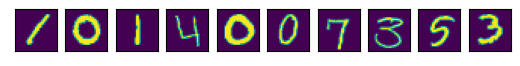

In [34]:
import matplotlib.pyplot as plt

m = 10
fig, axes = plt.subplots(1, m)
for index, series in train.head(m).iterrows():
    Xi = (series["pixel0":"pixel783"]).values.reshape(28, 28)
    axes[index].imshow(Xi)
    axes[index].set_xticks([]) # turn off xticks
    axes[index].set_yticks([]) # turn off yticks
plt.show()

## 辨識手寫數字圖片的數字

1. 虛假模型。
2. ~~基於規則的專家模型。~~
3. 基於深度學習的模型。

## 虛假模型

在 0 與 9 之間取隨機整數。

In [35]:
y = train["label"].values
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.randint(0, 10, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [36]:
errors_dummy = np.sum(y_valid != y_hat)
print(errors_dummy)
print(y_valid.size)
print(errors_dummy / y_valid.size)

12491
13860
0.9012265512265513


## 基於深度學習的模型

- 將 `pixel0` 到 `pixel783` 當作特徵矩陣 $X$ 作為手寫數字圖片的預測依據。
- 我們對機器學習和深度學習都是點到為止，不暸解 `MLPClassifier` 參數是正常的。

In [37]:
from sklearn.neural_network import MLPClassifier

X = train.loc[:, "pixel0":"pixel783"].values.astype(float)
X /= 255.0 # standardize X
y = train["label"].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, 
                               solver="sgd", verbose=10, random_state=1,
                               learning_rate_init=0.1)
mlp_classifier.fit(X_train, y_train)
y_hat = mlp_classifier.predict(X_valid)

Iteration 1, loss = 0.43180376
Iteration 2, loss = 0.20848267
Iteration 3, loss = 0.15877069
Iteration 4, loss = 0.12626574
Iteration 5, loss = 0.10516230
Iteration 6, loss = 0.08823135
Iteration 7, loss = 0.07438078
Iteration 8, loss = 0.06704161
Iteration 9, loss = 0.05740887
Iteration 10, loss = 0.04949325
Iteration 11, loss = 0.04269057
Iteration 12, loss = 0.03812857
Iteration 13, loss = 0.03424393
Iteration 14, loss = 0.02846397
Iteration 15, loss = 0.02558921
Iteration 16, loss = 0.02179269
Iteration 17, loss = 0.01983708
Iteration 18, loss = 0.01722650
Iteration 19, loss = 0.01611390
Iteration 20, loss = 0.01306801


/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


## 評估深度學習的模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [38]:
errors_dl = np.sum(y_valid != y_hat)
print(errors_dl)
print(y_valid.size)
print(errors_dl / y_valid.size)

469
13860
0.03383838383838384


## 該如何辨識手寫數字圖片的數字：考量哪個模型驗證資料與預測資料的誤分類數最少

1. 深度學習模型。
2. 虛假模型。

In [39]:
print(y_valid.size)
print(errors_dl)
print(errors_dummy)

13860
469
12491


## 重點統整

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。

## 重點統整（續）

- Scikit-Learn 的資料表達
    - 外型 `(m, n)` 的特徵矩陣 $X$
    - 外型 `(m,)` 的目標陣列 $y$
- 轉換器與預測器是 Scikit-Learn 所創造最重要的兩種類別
    - 轉換器（Transformers）：用來預處理資料。
    - 預測器（Predictors）：用來訓練模型、生成規則 $w$

## 重點統整（續）

- Scikit-Learn 應用程式介面設計原則
    - 一致性。
    - 可檢查性。
    - 不擴增新類別。
    - 可組合性。
    - 合理預設參數。

## 重點統整（續）

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。
- 採用基於深度學習的模型：
    - 問題完全不能用人類語言描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 重點統整（續）

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。
- 如何選擇模型：考量哪個模型驗證資料與預測資料的誤差最少。
    - 數值預測任務：均方誤差。
    - 類別預測任務：誤分類數。

## 延伸閱讀與進修方向

- 進修方向：資料科學模組與線性代數、微積分、統計、機器學習理論與深度學習理論的整合。
- 延伸閱讀：
    - [少年 Py 的大冒險](https://www.books.com.tw/products/0010863769)
    - [少年Py的大冒險－成為Python AI深度學習達人的第一門課](https://www.books.com.tw/products/0010936350)
    - [Python 資料科學學習手冊](https://www.books.com.tw/products/0010774364)
    - [Deep learning 深度學習必讀：Keras 大神帶你用 Python 實作](https://www.books.com.tw/products/0010822932)
    - [核心開發者親授！PyTorch深度學習攻略](https://www.books.com.tw/products/0010896119)
    - [資料科學基礎數學](https://www.books.com.tw/products/0010953604)
    - [深度學習](https://www.books.com.tw/products/0010837469)
    - [打下最紮實AI基礎不依賴套件：手刻機器學習神經網路穩健前進](https://www.books.com.tw/products/0010913397)